**Importing and Cleaning**

This notebook serves as introduction to the Kaggle Competition for Text Normalization. Whose data is available here: https://www.kaggle.com/c/text-normalization-challenge-english-language 

I will be using various packages such as numpy for computations, pandas for data frames, and MatPlotLib for visualizations. 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [32]:
trainFile = "C:/Users/Kycool13/Documents/GitHub/Kaggle_Text_Normalization/en_train.csv/en_train.csv"
train = pd.read_csv(trainFile)
train.shape

(9918441, 5)

In [33]:
train.head()

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of


We see from train that each sentence and token have an id associated to them. As well as a class associated to it. We have been tasked with transforming the tokens from the "before" to the "after"

In [34]:
testFile= "C:/Users/Kycool13/Documents/GitHub/Kaggle_Text_Normalization/en_test.csv/en_test.csv"
test = pd.read_csv(testFile)
test.shape

(1088564, 3)

In [35]:
test.head()

,sentence_id,token_id,before
0,0,0,Another
1,0,1,religious
2,0,2,family
3,0,3,is
4,0,4,of


In [36]:
submissions = pd.read_csv("C:/Users/Kycool13/Documents/GitHub/Kaggle_Text_Normalization/en_sample_submission.csv/en_sample_submission.csv")
submissions.head()

,id,after
0,0_0,Another
1,0_1,religious
2,0_2,family
3,0_3,is
4,0_4,of


As we mentioned above, we are asked to predict the "after" column. 

**Check for missing data.**

In [50]:
#Let's look at the columns and see if we can identify any with NaN values
train.isnull().any()

sentence_id    False
token_id       False
class          False
before          True
after           True
dtype: bool

**Let's look at the number of training and testing sentences since we are tasked with transforming sentences.**

In [37]:
num_train_sent = len(train.sentence_id.unique())
num_train_sent

748066

In [38]:
num_test_sent = len(test.sentence_id.unique())
num_test_sent

70000

How long are these sentences? Let's group by sentence_id and count them, then use the describe function to determine summary statistics. 

In [39]:
train_sent = train.groupby("sentence_id")["sentence_id"].count()
train_sent.describe()

count    748066.000000
mean         13.258778
std           6.071624
min           2.000000
25%           8.000000
50%          13.000000
75%          18.000000
max         256.000000
Name: sentence_id, dtype: float64

Looks like most of the sentences from the training set are between 8 and 18 tokens long. Next let's inspect the distribution. 

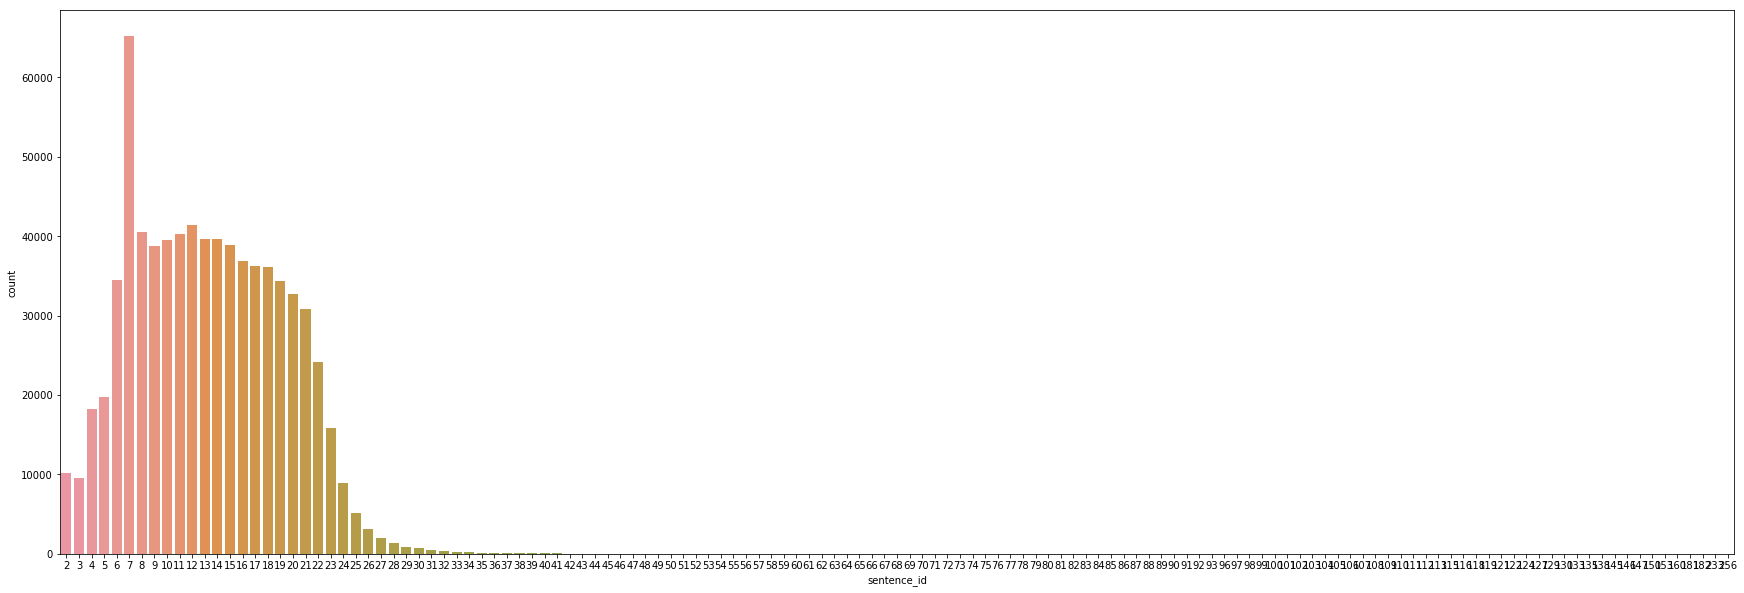

In [40]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
figure_length = sns.countplot(train_sent, ax = ax)

Interesting to note that sentences containing 7 tokens long is abnormally high. 

Next let's look at the test set. and compare distributions. 

In [41]:
test_sent = test.groupby("sentence_id")["sentence_id"].count()
test_sent.describe()

count    70000.000000
mean        15.550914
std          5.763962
min          2.000000
25%         11.000000
50%         16.000000
75%         20.000000
max        249.000000
Name: sentence_id, dtype: float64

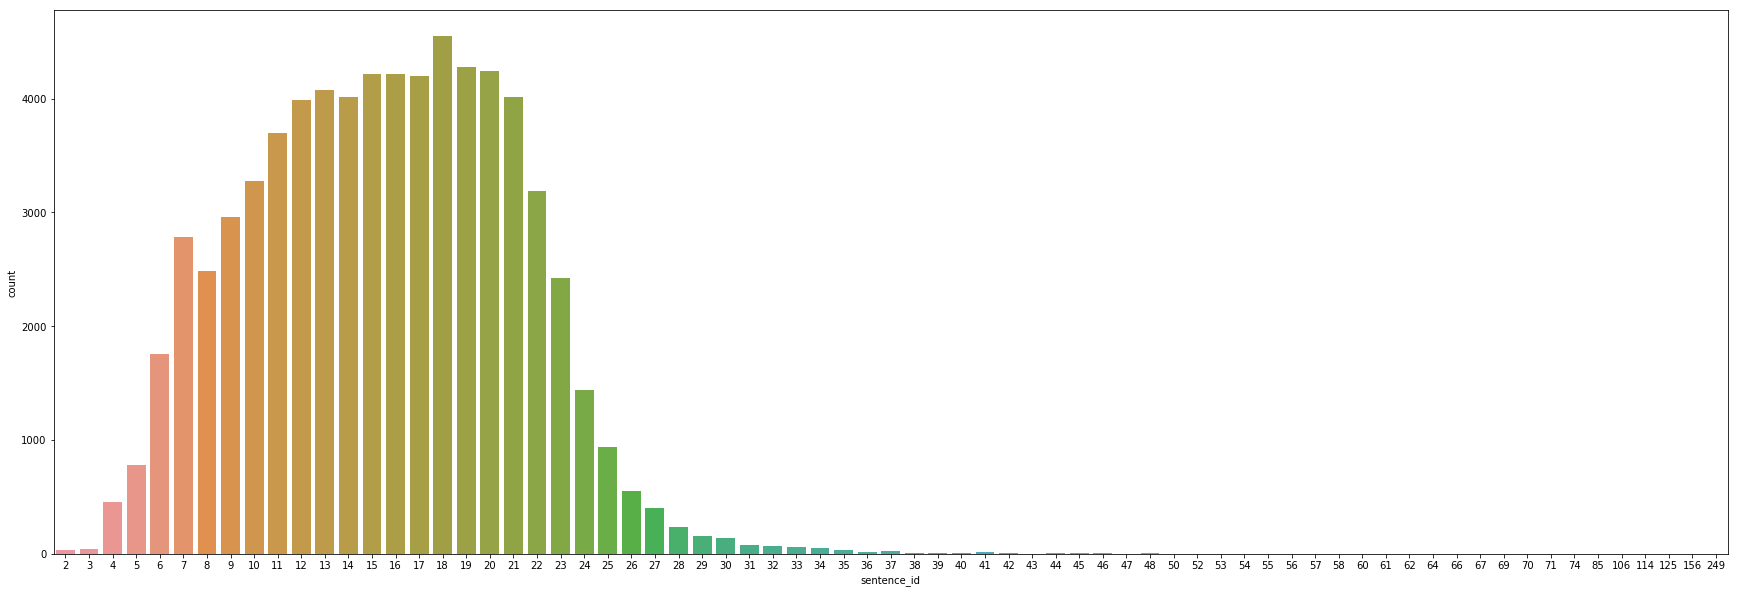

In [42]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
figure_length = sns.countplot(test_sent, ax = ax)

The values are shifted to the right, let's see how big the test set sentences are to the total. 

In [43]:
num_test_sent / (num_train_sent + num_test_sent)

0

This value above is not correct, I need a way to get further sig figs.

<h2> Comparing Before and After </h2>

Let's look at some example setences so we can see what these normalized sentences look like, and compare the before and after sentences. 

In [72]:
#Let's make a quick helper function that aids in our comparison of these sentences
def before_v_after(sentence_id):
    
    sent_id = sentence_id
    
    #Find the training sentence based on sentence id, and output the before column and save to variable bf
    bf = train.get_value(sent_id, 'before')
    
    #Find the training sentence based on sentence id, and ouput the after column and save to variable af
    af = train.get_value(sent_id, 'after')
    
    print("Before: "+ bf)
    print("After: "+ af)

before_v_after(11)

Before: IUCN
After: i u c n


Let's see the variations of the changes that can occur. As we can see above capital letters all in one word are separated and spaced apart. 

In [78]:
before_v_after(80)
before_v_after(95)

Before: 2008
After: two thousand eight
Before: 91
After: ninety one


Now we can see it changes numbers into their word form. 

In [80]:
before_v_after(147)

Before: April 10, 2013
After: april tenth twenty thirteen


In [81]:
before_v_after(165)

Before: vs
After: versus


<h1> Tokens </h1>